26 oct 2024
1.pandas datareader library using yahoo finance

2.components of the time series trend seasonality stationarity(cyclic) noise(irregularity)

3.

**bold text**

In [ ]:
! pip install pandas-datareader

**TIME SERIES DATA STEPS**

1.To do the basic visualisation exercises
2. Different techniques of pre processing or cleaning of data using time series without analysing
3. Do Analysis using decomposition- weekly or monthly etc.. breaking the data and comparing it
4. Evaluation Matrix : Evaluate the forecasts


In [ ]:
# importing library
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt


In [ ]:
#Get data from yahoo finance using pdr
!pip install yfinance
#import pandas_datareader.data as pdr
import yfinance as yf
data = yf.download('AAPL', start='2020-01-01',end='2023-12-31')



[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data)

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2020-01-02 00:00:00+00:00   72.796021   75.087502   75.150002   73.797501   
2020-01-03 00:00:00+00:00   72.088295   74.357498   75.144997   74.125000   
2020-01-06 00:00:00+00:00   72.662720   74.949997   74.989998   73.187500   
2020-01-07 00:00:00+00:00   72.320984   74.597504   75.224998   74.370003   
2020-01-08 00:00:00+00:00   73.484360   75.797501   76.110001   74.290001   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00+00:00  192.656174  193.600006  195.410004  192.970001   
2023-12-26 00:00:00+00:00  192.108856  193.050003  193.889999  192.830002   
2023-12-27 00:00:00+00:00  192.208359  193.149994  193.500000  191.089996   
2023-12-28 00:00:00+00:00  192.636276  193.580002  194.660004  193.169998   

In [ ]:
# get the column header without this ticker
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
# drop the ticker
data.columns = data.columns.droplevel(0)
data.head()

Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


In [ ]:
# create an index starting from 0
data.reset_index(drop=False,inplace=True)
data.head()

Ticker,Date,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02 00:00:00+00:00,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03 00:00:00+00:00,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06 00:00:00+00:00,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07 00:00:00+00:00,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08 00:00:00+00:00,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


In [ ]:
data.columns

Index(['Date', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'], dtype='object', name='Ticker')

In [ ]:
# change the column names
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00+00:00,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03 00:00:00+00:00,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06 00:00:00+00:00,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07 00:00:00+00:00,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08 00:00:00+00:00,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1006 non-null   datetime64[ns, UTC]
 1   Open       1006 non-null   float64            
 2   High       1006 non-null   float64            
 3   Low        1006 non-null   float64            
 4   Close      1006 non-null   float64            
 5   Adj Close  1006 non-null   float64            
 6   Volume     1006 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 55.1 KB


In [ ]:
# preprocessing on date column to fit only date
data['Date'] = pd.to_datetime(data['Date']).dt.date
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
1,2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2,2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
3,2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


# **Data visualisation on time series data
 1 line plot

 2.Seasonal plots
 3. Histograms
 4. Decomposition**

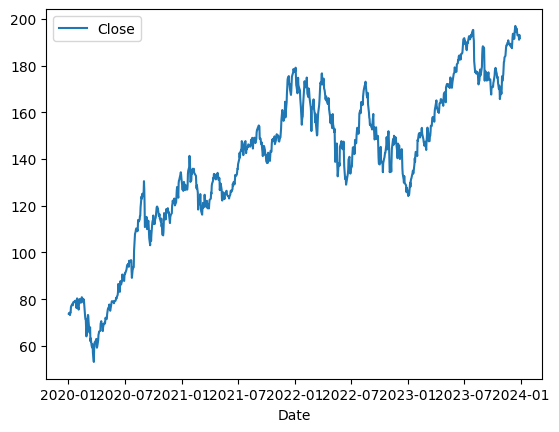

In [ ]:
# Line plots
data.plot(x='Date',y='Close',kind='line')
plt.show()

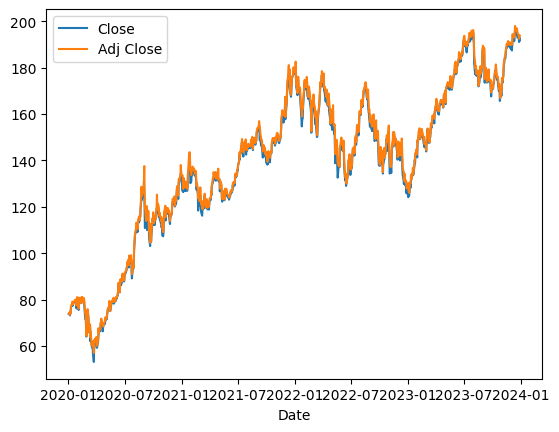

In [ ]:
# compare two prices
data.plot(x='Date',y=['Close','Adj Close'],kind='line')
plt.show()

In [ ]:
# Seasonal plots - Deduct seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# plotting the opening price

data['month'] = pd.to_datetime(data['Date'],format ='%Y-%m-%d').dt.month
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400,1
1,2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800,1
2,2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200,1
3,2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000,1
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,1


<Figure size 1000x600 with 0 Axes>

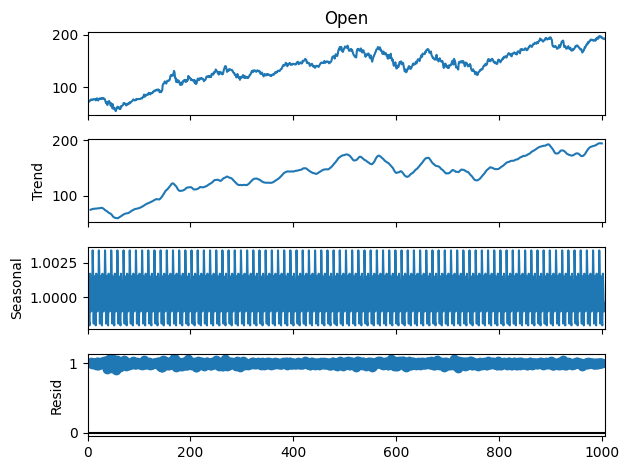

In [ ]:
plt.figure(figsize=(10,6))
result = seasonal_decompose(data['Open'],model='multiplicative',period=12)
result.plot()
plt.show()

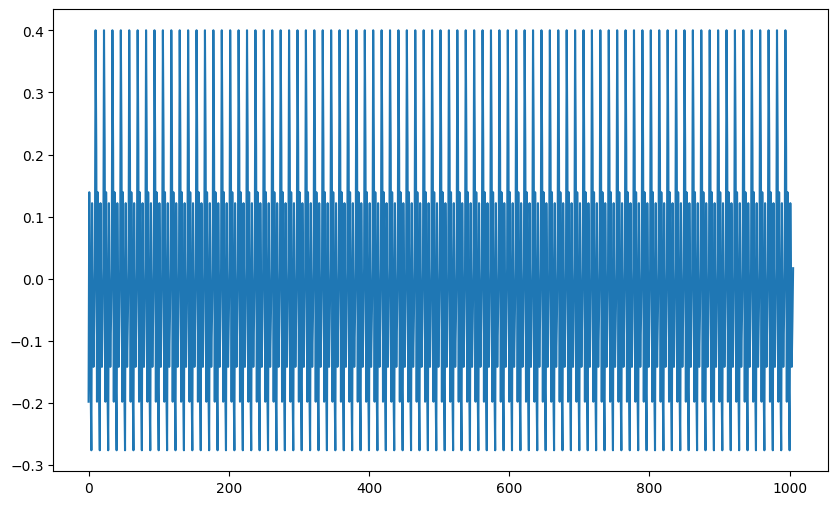

In [ ]:
# plot the seasonal component
plt.figure(figsize=(10,6))
result.seasonal.plot()
plt.show()

# REmoving the seasonality

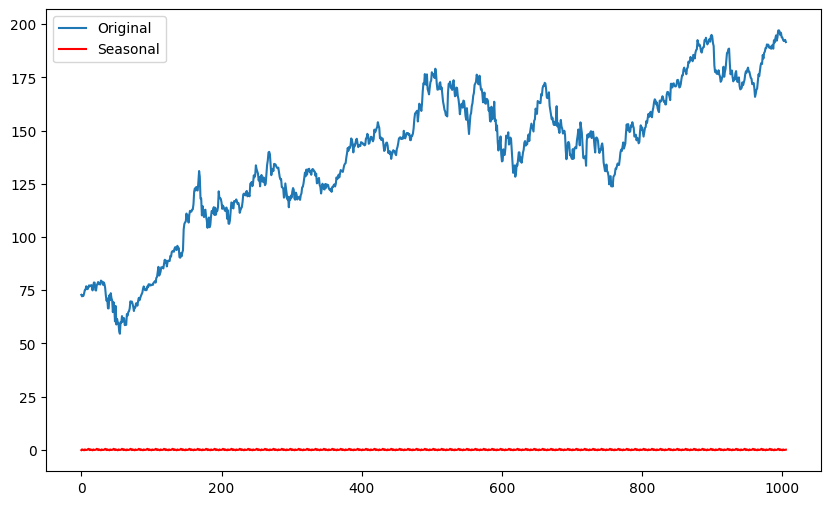

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data['Open'], label = 'Original')
plt.plot(result.seasonal,color ='red', label = 'Seasonal')
plt.legend(loc ='best')
plt.show()

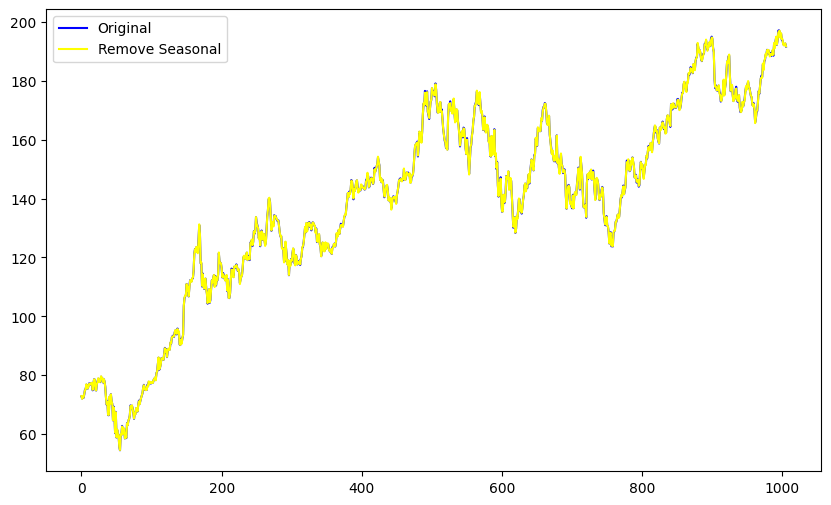

In [ ]:
# data without seasonal
plt.figure(figsize=(10,6))
plt.plot(data['Open'], label = 'Original',color ='blue')
data_open_without_seasonal = data['Open'] / result.seasonal
plt.plot(data_open_without_seasonal, label = 'Remove Seasonal',color = 'yellow')
plt.legend(loc ='best')
plt.show()

seasonal plots- recurring patterns

In [ ]:
data.reset_index(drop=True,inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400,1
1,2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800,1
2,2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200,1
3,2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000,1
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,1


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# perform decomposition based on seasonality
decomposition = seasonal_decompose(data['Open'],model='additive',period=365)

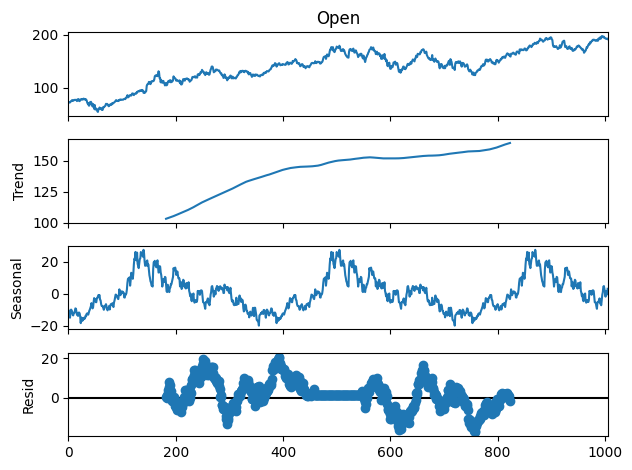

In [ ]:
# plot the decomposed
decomposition.plot()
plt.show()

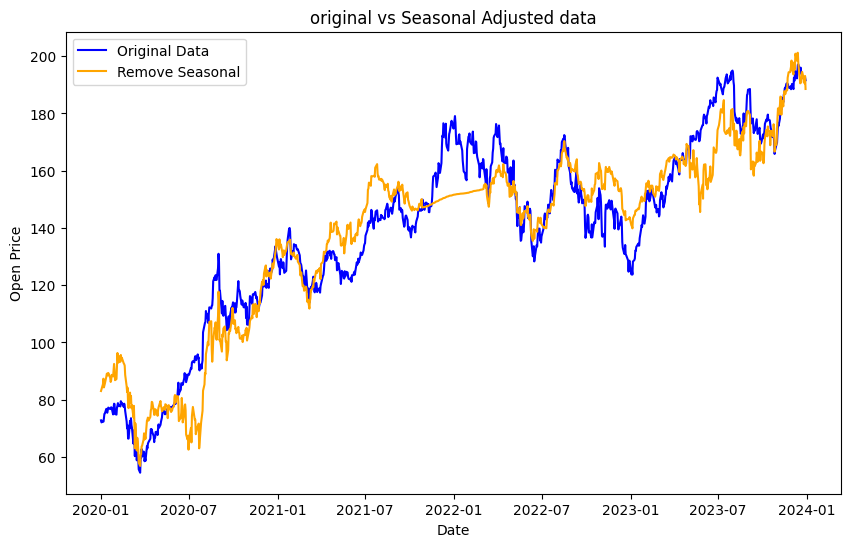

In [ ]:
# Removing seasonality
seasonality_adjusted = data['Open'] - decomposition.seasonal
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Open'],label = 'Original Data',color ='blue')
plt.plot(data['Date'],seasonality_adjusted, label = 'Remove Seasonal',color = 'orange')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('original vs Seasonal Adjusted data')
plt.legend(loc ='best')
plt.show()


In [ ]:
# arima,ets,prophet,sarimax tomm

# 2. Preprocess in following cases:
1. missing value
2. outliers
3. stationarity and Transformations

In [ ]:
# Stationarity: 3 types:
# 1. Trend,
# 2. Seasonal
# 3. Strictly

In [ ]:
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,month
0,2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400,1
1,2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800,1
2,2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200,1
3,2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000,1
4,2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200,1
5,2020-01-09,75.045219,77.407501,77.607498,76.550003,76.809998,170108400,1
6,2020-01-10,75.214867,77.582497,78.167503,77.062500,77.650002,140644800,1
7,2020-01-13,76.821785,79.239998,79.267502,77.787498,77.910004,121532000,1
8,2020-01-14,75.784447,78.169998,79.392502,78.042503,79.175003,161954400,1
9,2020-01-15,75.459686,77.834999,78.875000,77.387497,77.962502,121923600,1


In [ ]:
# reset index to date column because of missing date values
data.set_index('Date',inplace=True)
# drop the month column
data.drop('month',axis=1,inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,72.796021,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320984,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484360,75.797501,76.110001,74.290001,74.290001,132079200


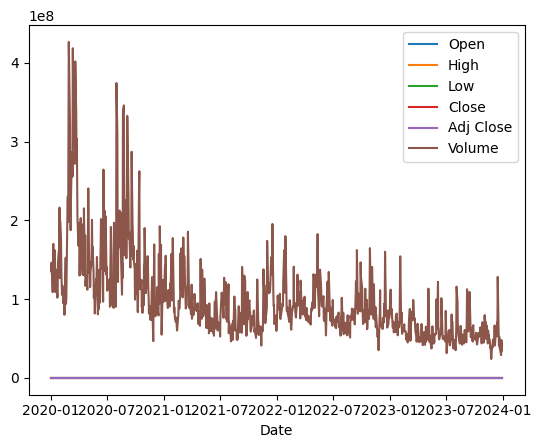

In [ ]:
# remove stationarity features
# First lets plot:
data.plot()
plt.show()

In [ ]:
# descriptive stats
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,138.711616,140.808131,142.321389,139.143536,140.675507,9.895211e+07
std,33.540053,33.313857,33.430571,33.179199,33.310018,5.439653e+07
min,54.509766,56.092499,57.125000,53.152500,57.020000,2.404830e+07
25%,121.054724,123.592501,125.030003,122.157499,123.682503,6.407675e+07
50%,143.596558,145.860001,147.264999,144.120003,145.540001,8.467540e+07
75%,164.086563,166.214996,168.147503,164.815002,166.302498,1.155069e+08
max,197.144180,198.110001,199.619995,197.000000,198.020004,4.265100e+08


In [ ]:
# split the data.open into 3 parts and find mean nd variance for all parts
values = data['Open'].values
parts = int(len(values) /3)
part_1, part_2, part_3 = values[0:parts], values[parts:parts*2], values[parts*2:]


In [ ]:
part_1

array([ 72.79602051,  72.08829498,  72.66271973,  72.32098389,
        73.48435974,  75.04521942,  75.21486664,  76.82178497,
        75.78444672,  75.45968628,  76.40492249,  77.25078583,
        76.72725677,  77.00115204,  77.3719635 ,  77.14899445,
        74.88041687,  76.99873352,  78.61048889,  78.49658203,
        75.0161438 ,  74.81011963,  77.27986908,  77.91002655,
        78.82133484,  77.74996185,  78.11924744,  77.6479187 ,
        79.49188995,  78.9258194 ,  78.94526672,  77.49971771,
        78.62213898,  77.81556702,  76.05420685,  72.44160461,
        69.98782349,  71.09809113,  66.45053864,  66.41168213,
        72.59463501,  70.28908539,  73.54941559,  71.16370392,
        70.21862793,  64.6648941 ,  69.32215881,  66.91458893,
        60.30643845,  67.53166962,  58.84391785,  61.43128967,
        59.92744827,  59.46828842,  55.69291687,  54.50976562,
        59.97847748,  59.64806747,  62.7869339 ,  60.18740082,
        61.90503311,  61.77870178,  58.52808762,  59.50

In [ ]:
part_2

array([129.79858398, 125.20558167, 125.45040894, 127.05648804,
       127.73338318, 124.43727112, 123.51514435, 120.43488312,
       122.59301758, 125.02584839, 123.86830902, 122.47531128,
       122.31835938, 124.88851929, 123.04425812, 124.68250275,
       124.48631287, 124.43727112, 122.89713287, 122.23986816,
       121.91616058, 122.68132019, 121.19023895, 123.4955368 ,
       123.50533295, 124.32936096, 124.71193695, 123.71133423,
       124.92776489, 127.99822998, 127.17420959, 127.67448425,
       129.28330994, 127.97861481, 129.78359985, 131.43162537,
       131.15698242, 130.8724823 , 130.57818604, 132.21644592,
       133.73692322, 134.35496521, 134.65907288, 137.29789734,
       139.31869507, 141.82023621, 140.51553345, 142.34996033,
       141.75157166, 142.86987305, 146.31311035, 145.65585327,
       143.6056366 , 139.74053955, 143.37017822, 142.63442993,
       144.0078125 , 145.73432922, 146.15614319, 143.97840881,
       142.22242737, 142.86987305, 143.08569336, 142.75

In [ ]:
part_3

array([156.99586487, 155.32624817, 156.05731201, 153.93322754,
       152.66860962, 154.0814209 , 152.59947205, 155.47442627,
       161.46141052, 151.98695374, 153.4392395 , 150.53465271,
       148.88476562, 152.61921692, 155.0100708 , 151.86839294,
       150.90020752, 148.61801147, 148.95391846, 149.93197632,
       148.03512573, 140.76377869, 136.5353241 , 140.73413086,
       144.34017944, 144.6365509 , 143.67822266, 138.40255737,
       138.72857666, 137.30593872, 136.6736145 , 141.2676239 ,
       136.71316528, 140.69464111, 142.01846313, 142.12715149,
       141.66279602, 145.49607849, 147.64981079, 150.50498962,
       147.55102539, 143.05584717, 153.86407471, 151.49295044,
       148.83535767, 143.2830658 , 137.20713806, 136.93994141,
       137.47433472, 138.04827881, 133.46646118, 145.34161377,
       148.14213562, 146.73692322, 148.47859192, 147.24159241,
       149.15153503, 149.71562195, 146.46972656, 148.61714172,
       149.49787903, 146.56872559, 142.71917725, 139.70

In [ ]:
# calculate mean and variance for all 3 parts
mean_1, mean_2, mean_3 = np.mean(part_1), np.mean(part_2), np.mean(part_3)
var_1, var_2, var_3 = np.var(part_1), np.var(part_2), np.var(part_3)

min_1 = np.min(part_1)
max_1 = np.max(part_1)

min_2 = np.min(part_2)
max_2 = np.max(part_2)

min_3 = np.min(part_3)
max_3 = np.max(part_3)

print(f'Mean 1: {mean_1},Mean 2: {mean_2},Mean 3: {mean_3}')

print(f'Variance 1: {var_1}, Variance 2:{var_2},Variance 3: {var_3}')

print(f'Min 1: {min_1},Max 1: {max_1}')

print(f'Min 2: {min_2},Max 2: {max_2}')

print(f'Min 3: {min_3},Max 3: {max_3}')

Mean 1: 101.15761922580093,Mean 2: 150.58179631019706,Mean 3: 164.31899256933303
Variance 1: 563.9998154201941, Variance 2:219.9158926766916,Variance 3: 380.8538930193986
Min 1: 54.509765625,Max 1: 139.98973083496094
Min 2: 120.43488311767578,Max 2: 179.0765838623047
Min 3: 123.71897888183594,Max 3: 197.14418029785156


In [ ]:
# perform ADF test
# Augmented Dickey Fuller test

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Open'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.511951
p-value: 0.527591
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [ ]:
# Null Hypothesis - Data is non stationary - data does not have any partiular repetetive value
#Alternate Hypothesis - Data is statioinary

# if p <=0.05 --> reject Null hypothesis

In [ ]:
# so we found the data is not stationary so we fail to reject  the NUll hypothesis

# also ADF stat is -1.52 is greater than all critical values
# so we need to solve this we have 3 ways:
# 1. Differencing
# 2. log transformation
# 3. Detrending